## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Sensor Data
**Steps**:
1. Load Dataset
2. Feature Selection
3. Isolation Forest Implementation
4. Plot Results

Sample data saved as 'sensor_data.csv'.


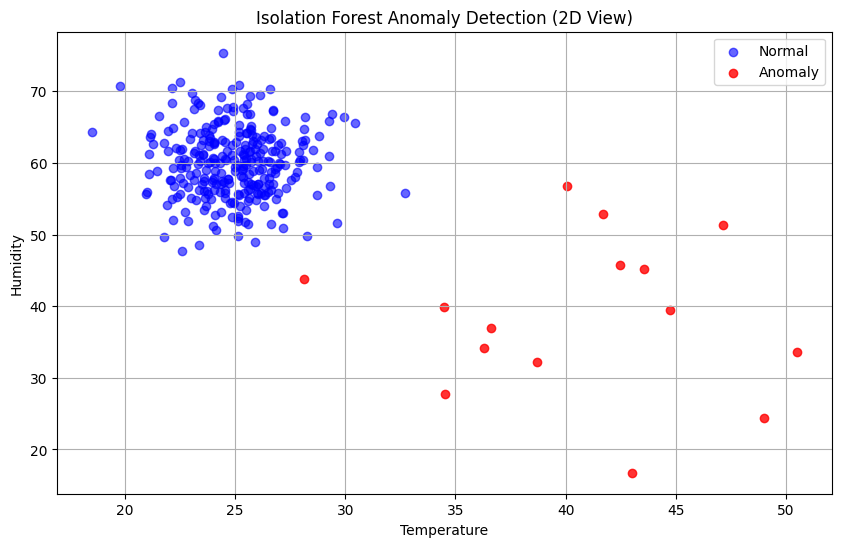

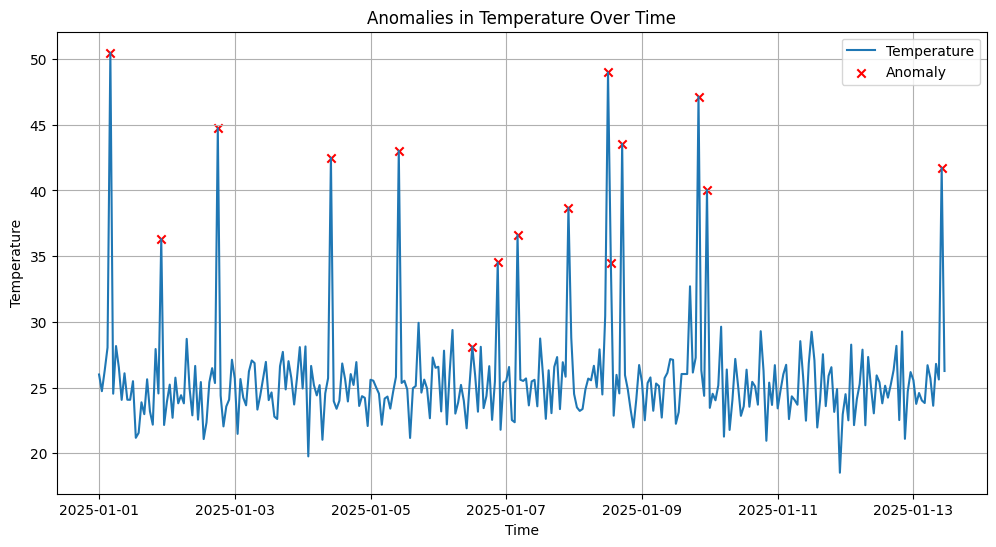

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Generate and Save Dummy Sensor Data
np.random.seed(42)

# Create synthetic time-series sensor data
n_samples = 300
timestamps = pd.date_range(start="2025-01-01", periods=n_samples, freq='H')

# Normal data
temperature = np.random.normal(loc=25, scale=2, size=n_samples)
humidity = np.random.normal(loc=60, scale=5, size=n_samples)
vibration = np.random.normal(loc=0.3, scale=0.05, size=n_samples)

# Inject anomalies
anomaly_indices = np.random.choice(n_samples, size=15, replace=False)
temperature[anomaly_indices] += np.random.normal(15, 5, size=15)
humidity[anomaly_indices] -= np.random.normal(20, 10, size=15)
vibration[anomaly_indices] += np.random.normal(0.5, 0.1, size=15)

# Create DataFrame
df = pd.DataFrame({
    'timestamp': timestamps,
    'temperature': temperature,
    'humidity': humidity,
    'vibration': vibration
})

# Save to CSV
df.to_csv("sensor_data.csv", index=False)
print("Sample data saved as 'sensor_data.csv'.")

# Step 2: Feature Selection
features = ['temperature', 'humidity', 'vibration']
X = df[features]

# Step 3: Isolation Forest Implementation
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X)
df['anomaly'] = iso_forest.predict(X)

# Step 4A: Scatter Plot (2D)
plt.figure(figsize=(10, 6))
normal = df[df['anomaly'] == 1]
anomaly = df[df['anomaly'] == -1]

plt.scatter(normal['temperature'], normal['humidity'], c='blue', label='Normal', alpha=0.6)
plt.scatter(anomaly['temperature'], anomaly['humidity'], c='red', label='Anomaly', alpha=0.8)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Isolation Forest Anomaly Detection (2D View)')
plt.legend()
plt.grid(True)
plt.show()

# Step 4B: Time Series Plot
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['temperature'], label='Temperature')
plt.scatter(df[df['anomaly'] == -1]['timestamp'], 
            df[df['anomaly'] == -1]['temperature'], 
            color='red', label='Anomaly', marker='x')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Anomalies in Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()
